In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Загрузка сигнала
with open('CryptedFreq.npy', 'rb') as f:
    sigCoded = np.load(f)
    

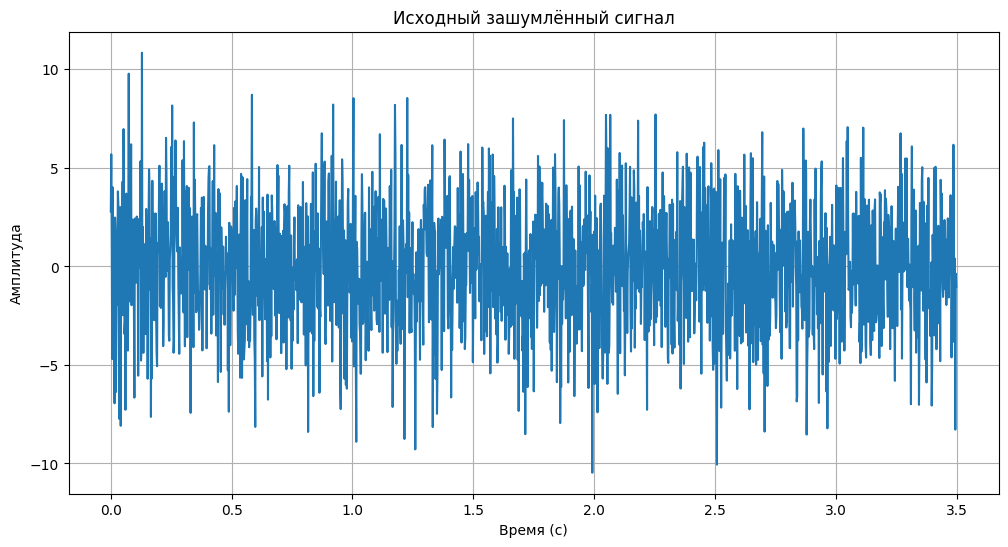

In [20]:
fs = 512  # Частота дискретизации (Гц)
N = len(sigCoded)  # Длина сигнала
t = np.arange(N) / fs  # Временная ось

# Визуализация исходного сигнала
plt.figure(figsize=(12, 6))
plt.plot(t, sigCoded)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Исходный зашумлённый сигнал')
plt.grid()
plt.show()

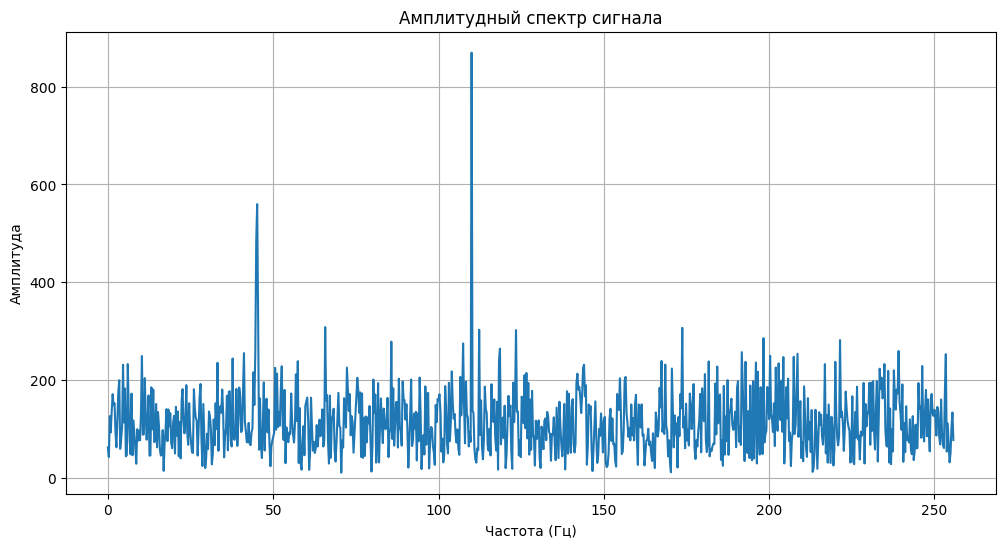

In [21]:
# Вычисление ДПФ
fft_signal = fft(sigCoded)
freqs = fftfreq(N, 1/fs)[:N//2]  # Односторонний спектр
magnitude = np.abs(fft_signal[:N//2])  # Амплитуда спектра

# Визуализация спектра
plt.figure(figsize=(12, 6))
plt.plot(freqs, magnitude)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Амплитудный спектр сигнала')
plt.grid()
plt.show()

In [22]:
# Порог для выделения значимых частот
threshold = 0.5 * np.max(magnitude)  

# Находим пики, превышающие порог
peaks = freqs[magnitude > threshold]
print("Найденные частоты (Гц):", peaks)

# Округляем до целых значений
integer_freqs = np.unique(np.round(peaks)).astype(int)
print("Целевые частоты (целые Гц):", integer_freqs)

Найденные частоты (Гц): [ 44.85714286  45.14285714 110.        ]
Целевые частоты (целые Гц): [ 45 110]


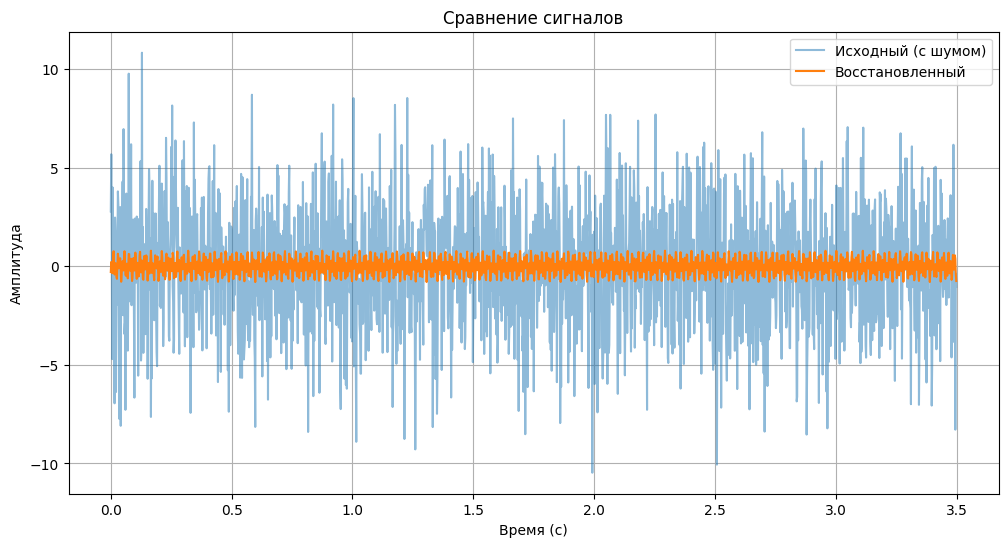

In [23]:
# Создаём чистый сигнал только с найденными частотами
clean_signal = np.zeros(N, dtype=complex)
for freq in integer_freqs:
    idx = np.argmin(np.abs(freqs - freq))  # Ближайшая частотная ячейка
    clean_signal[idx] = fft_signal[idx]  # Сохраняем только значимые компоненты

# Обратное ДПФ
reconstructed = np.real(ifft(clean_signal))

# Визуализация результата
plt.figure(figsize=(12, 6))
plt.plot(t, sigCoded, alpha=0.5, label='Исходный (с шумом)')
plt.plot(t, reconstructed, label='Восстановленный')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение сигналов')
plt.legend()
plt.grid()
plt.show()

In [24]:
for freq in integer_freqs:
    idx = np.argmin(np.abs(freqs - freq))
    amplitude = 2 * np.abs(fft_signal[idx]) / N  # Нормировка амплитуды
    phase = np.angle(fft_signal[idx])  # Фаза
    print(f'Частота {freq} Гц: амплитуда {amplitude:.3f}, фаза {phase:.3f} рад')

Частота 45 Гц: амплитуда 0.625, фаза -3.072 рад
Частота 110 Гц: амплитуда 0.970, фаза -1.521 рад
